In [12]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split


train = pd.read_csv('../data/final_ml/final_ml.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207259 entries, 0 to 6207258
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   tableName     object 
 1   ed            float64
 2   jaccard       float64
 3   jaccardNgram  float64
 4   p_subj_ne     float64
 5   p_subj_lit    float64
 6   p_obj_ne      float64
 7   desc          float64
 8   descNgram     float64
 9   target        int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 473.6+ MB


In [33]:
t = {"a": 2, "b": 3, "z": 1, "c": 3}
t["f"] = 9
{e:t[e] for e in t}

{'a': 2, 'b': 3, 'z': 1, 'c': 3, 'f': 9}

In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 23.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 6.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 11.8 MB

In [2]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


,tableName,ntoken,popularity,pos_score,es_score,es_diff_score,ed,jaccard,jaccardNgram,cosine_similarity,p_subj_ne,p_subj_lit,p_obj_ne,desc,descNgram,target
0,99070098_0_2074872741302696997,1,9,0.02,37.54,0.003,1.00,1.0,1.00,1.00,0.0,0.000,0.0,0.0,0.0,1
1,99070098_0_2074872741302696997,1,47,0.01,37.89,0.009,1.00,1.0,1.00,1.00,0.0,0.000,0.0,0.0,0.0,0
2,99070098_0_2074872741302696997,1,41,0.07,37.09,0.002,1.00,1.0,1.00,1.00,0.0,0.619,0.0,0.0,0.0,0
3,99070098_0_2074872741302696997,3,5,0.01,72.45,0.037,1.00,1.0,1.00,1.00,0.0,0.603,0.0,0.0,0.0,1
4,99070098_0_2074872741302696997,3,46,0.75,35.78,0.000,0.22,0.4,0.11,0.56,0.0,0.619,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920200,A2E9MHNH,1,30,0.02,41.65,0.004,1.00,1.0,1.00,1.00,0.0,0.378,0.0,0.0,0.0,0
920201,A2E9MHNH,1,18,0.15,40.59,0.002,0.38,0.5,0.38,0.60,0.0,0.241,0.0,0.0,0.0,0
920202,A2E9MHNH,1,103,0.02,10.08,0.000,0.90,0.0,0.75,0.62,0.0,1.492,0.0,0.0,0.0,1
920203,A2E9MHNH,1,117,0.43,9.68,0.001,0.40,0.0,0.31,0.34,0.0,0.952,0.0,0.0,0.0,0


# Logistic Regressor

In [29]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
# define data
scaler = MinMaxScaler()

def get_folds(folds):
    all_folds = []
    current = folds
    for i in range(0, len(folds)):
        all_folds.append(current)
        current = rotate(current, 1)
    return all_folds

def rotate(l, n):
    return l[n:] + l[:n]

path = "./data/ml_with_type/2_folds/logistic1"
permutations = get_folds([1, 2, 3, 4, 5])

for j, permutation in enumerate(permutations):
    permutation = permutations[3]
    train = []
    for i in range(len(permutation)-1):
        fold = permutation[i]
        data = pd.read_csv(f"{path}/fold{fold}.csv")
        train.append(data)

    train_fold = pd.concat(train)
    train_fold.drop_duplicates(subset=list(set(train_fold.columns) - set(["tableName"])), inplace=True)
    fold = permutation[-1]
    test_fold = pd.read_csv(f"{path}/fold{fold}.csv")    
    X_train, y_train = train_fold.drop(["tableName", "target"], axis=1), train_fold["target"]
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    

    X_test, y_test = test_fold.drop(["tableName", "target"], axis=1), test_fold["target"]
    scaler = preprocessing.StandardScaler().fit(X_test)
    X_test = scaler.transform(X_test)
    X_resampled, y_resampled = (X_train, y_train)
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    #X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)
    #X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

    logmodel = LogisticRegression()
    logmodel.fit(X_resampled, y_resampled)
    predictions = logmodel.predict(X_test)
    print(f"FOLD", classification_report(y_test.values,predictions))
    break

FOLD               precision    recall  f1-score   support

           0       0.91      0.92      0.91   1067054
           1       0.86      0.85      0.85    664486

    accuracy                           0.89   1731540
   macro avg       0.88      0.88      0.88   1731540
weighted avg       0.89      0.89      0.89   1731540



In [30]:
import pickle
pickle.dump(logmodel, open('logistic1.pkl','wb'))

In [285]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd

def get_folds(folds):
    all_folds = []
    current = folds
    for i in range(0, len(folds)):
        all_folds.append(current)
        current = rotate(current, 1)
    return all_folds

def rotate(l, n):
    return l[n:] + l[:n]

path = "./data/tmp/"
permutations = get_folds([1, 2, 3, 4, 5])

for j, permutation in enumerate(permutations):
    permutation = permutations[3]
    train = []
    for i in range(len(permutation)-1):
        fold = permutation[i]
        data = pd.read_csv(f"{path}/fold{fold}.csv")
        train.append(data)

    train_fold = pd.concat(train)
    train_fold.drop_duplicates(subset=list(set(train_fold.columns) - set(["target", "tableName"])), inplace=True)
    X_train, y_train = train_fold.drop(["tableName", "target"], axis=1), train_fold["target"]

In [28]:
logmodel.predict_proba(X_train)

array([[0.422877  , 0.577123  ],
       [0.3832703 , 0.6167297 ],
       [0.35806257, 0.64193743],
       ...,
       [0.34667271, 0.65332729],
       [0.99878712, 0.00121288],
       [0.97780906, 0.02219094]])

In [64]:
logmodel

LogisticRegression()

# Save model

In [286]:
import joblib
joblib_file = "logistic2_r1.pkl"
joblib.dump(logmodel, joblib_file)

['logistic2_r1.pkl']

In [ ]:
y_train

In [202]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                          
                                    )

In [203]:
class_weights

array([0.76161029, 1.4556199 ])

# Neural Network

In [21]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

import pandas as pd
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np

def get_folds(folds):
    all_folds = []
    current = folds
    for i in range(0, len(folds)):
        all_folds.append(current)
        current = rotate(current, 1)
    return all_folds

def rotate(l, n):
    return l[n:] + l[:n]


path = "./data/ml_with_type/2_folds/neural1/"
permutations = get_folds([1, 2, 3, 4, 5])
permutations
#output = open("network_0_hidden_layer.txt", "w")
for j, permutation in enumerate(permutations):
    permutation = permutations[1]
    train = []
    for i in range(len(permutation)-1):
        fold = permutation[i]
        data = pd.read_csv(f"{path}/fold{fold}.csv")
        train.append(data)
        
    train_fold = pd.concat(train)
    train_fold.drop_duplicates(subset=list(set(train_fold.columns) - set(["tableName"])), inplace=True)
    fold = permutation[-1]
    test_fold = pd.read_csv(f"{path}/fold{fold}.csv")    
    X_train, y_train = train_fold.drop(["tableName", "target"], axis=1), train_fold["target"]
    class_weights = compute_class_weight(
        class_weight = "balanced",
        classes = np.unique(y_train),
        y = y_train                                          
    )
    X_test, y_test = test_fold.drop(["tableName", "target"], axis=1), test_fold["target"]
    X_resampled, y_resampled = (X_train, y_train)
    #X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
    Y_train = np_utils.to_categorical(y_resampled, 2)
    Y_test = np_utils.to_categorical(y_test, 2)
    # load the dataset
    # define the keras model
    model = Sequential()
    model.add(Dense(64, input_shape=(len(X_train.columns),), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    # compile the keras model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    model.fit(X_resampled, Y_train, epochs=10, batch_size=10000, class_weight={0:class_weights[0], 1:class_weights[1]})
    # Test, Loss and accuracy
    loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=10000)
    print('Loss = ',loss_and_metrics[0])
    print('Accuracy = ',loss_and_metrics[1])
    predictions = model.predict(X_test, batch_size=10000)
    # Convert the predictions to binary labels
    predictions = np.where(predictions > 0.5, 1, 0)

    # Calculate the classification report
    report = classification_report(Y_test, predictions)

    # Print the report
    print(f"FOLD{j+1}", report)
    #output.write(f"FOLD{j+1} {report}\n")
    break
#output.close()    

Epoch 1/10
622/622 [==============================] - 30s 42ms/step - loss: 0.2164 - accuracy: 0.9117
Epoch 2/10
622/622 [==============================] - 26s 42ms/step - loss: 0.1813 - accuracy: 0.9285
Epoch 3/10
622/622 [==============================] - 26s 42ms/step - loss: 0.1720 - accuracy: 0.9326
Epoch 4/10
622/622 [==============================] - 25s 41ms/step - loss: 0.1671 - accuracy: 0.9348
Epoch 5/10
622/622 [==============================] - 26s 41ms/step - loss: 0.1627 - accuracy: 0.9366
Epoch 6/10
622/622 [==============================] - 25s 41ms/step - loss: 0.1591 - accuracy: 0.9380
Epoch 7/10
622/622 [==============================] - 25s 40ms/step - loss: 0.1563 - accuracy: 0.9390
Epoch 8/10
622/622 [==============================] - 25s 40ms/step - loss: 0.1541 - accuracy: 0.9400
Epoch 9/10
622/622 [==============================] - 25s 40ms/step - loss: 0.1516 - accuracy: 0.9409
Epoch 10/10
150/150 [==============================] - 2s 14ms/step - loss: 0.2866

In [20]:
model.save("neural_network1.h5")

In [263]:
scaler = preprocessing.StandardScaler().fit([list(test.values())])
X_test = scaler.transform([list(test.values())])
logmodel.predict_proba(X_test)

In [8]:
from keras.models import load_model
model1 = load_model("./process/neural_network2_r1.h5")

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [14]:
test = { 
    "ntoken": 2,
"popularity": 10,
"pos_score": 0.11,
"es_score": 27.19,
"es_diff_score": 1.23E-4,
"ed": 0.87,
"jaccard": 0.5,
"jaccardNgram": 0.8,
"cosine_similarity": 0.68,
"p_subj_ne": 0,
"p_subj_lit": 1.895,
"p_obj_ne": 0,
"desc": 0.0,
"descNgram": 0.0,
    "cta": 1,
    "ctaMax": 1,
    "cpa": 1,
    "cpaMax": 1,
    "neural1_score": 0,
    "neural1_score_diff": 0
}
model.predict([list(test.values())])

1/1 [==============================] - 0s 61ms/step


array([[0.06059259, 0.93940747]], dtype=float32)

In [275]:
test = { 
    "ntoken" : 4, 
    "popularity" : 30, 
    "pos_score" : 0.01, 
    "es_score" : 105.96, 
    "es_diff_score" : 1, 
    "ed" : 0.68, 
    "jaccard" : 0.75, 
    "jaccardNgram" : 0.61, 
    "cosine_similarity" : 0.87, 
    "p_subj_ne" : 2.0, 
    "p_subj_lit" : 0, 
    "p_obj_ne" : 0, 
    "desc" : 0.0, 
    "descNgram" : 0.5
}
model.predict([list(test.values())])

1/1 [==============================] - 0s 61ms/step


array([[9.5316918e-06, 9.9999046e-01]], dtype=float32)

In [273]:
test = {
"ntoken": 2,
"popularity": 10,
"pos_score": 0.11,
"es_score": 27.19,
"es_diff_score": 1.23E-4,
"ed": 0.87,
"jaccard": 0.5,
"jaccardNgram": 0.8,
"cosine_similarity": 0.68,
"p_subj_ne": 0,
"p_subj_lit": 1.895,
"p_obj_ne": 0,
"desc": 0.0,
"descNgram": 0.0
}
model.predict([list(test.values())])

1/1 [==============================] - 0s 113ms/step


array([[0.06914807, 0.930852  ]], dtype=float32)

In [261]:
test = { 
  "ntoken": 2,
"popularity": 1,
"pos_score": 0.01,
"es_score": 58.34,
"es_diff_score": 1.112493,
"ed": 1.0,
"jaccard": 1.0,
"jaccardNgram": 1.0,
"cosine_similarity": 1.0,
"p_subj_ne": 0,
"p_subj_lit": 2.283,
"p_obj_ne": 0,
"desc": 0.0,
"descNgram": 0.0,
}
model.predict([list(test.values())])

1/1 [==============================] - 0s 70ms/step


array([[8.321295e-08, 9.999999e-01]], dtype=float32)

# AVG perfomance

In [33]:
for file in ["./network_0_hidden_layer.txt", "network_1_hidden_layer.txt", "logistic.txt"]:
    file = open(file)
    data = file.read().split("\n")
    data[0].split()
    c0 = [0, 0, 0]
    c1 = [0, 0, 0]
    for row in data:
        row = row.split()
        if len(row) == 0:
            continue
        if row[0] == '0':
            for i, v in enumerate(row[1:4]):
                c0[i] += float(v)
        elif row[0] == '1':
            for i, v in enumerate(row[1:4]):
                c1[i] += float(v)        


    header = ["\t\tP", "\t\tR", "\t\tF1"]
    c0 = ["0"] + [f"\t{round(v/5, 2)}" for v in c0] 
    c1 = ["1"] + [f"\t{round(v/5, 2)}" for v in c1]    
    out = " ".join(header) + "\n" + " ".join(c0) + "\n" +" ".join(c1)
    print(file.name.split("/")[-1], "\n", out, "\n")

network_0_hidden_layer.txt 
 		P 		R 		F1
0 	0.95 	0.94 	0.94
1 	0.88 	0.89 	0.89 

network_1_hidden_layer.txt 
 		P 		R 		F1
0 	0.95 	0.94 	0.95
1 	0.89 	0.9 	0.89 

logistic.txt 
 		P 		R 		F1
0 	0.96 	0.88 	0.92
1 	0.79 	0.93 	0.86 



# Score Distributions

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def make_prediction(model, data_source):
    test = pd.read_csv(data_source)
    new_df = test.drop(columns=["tableName", "target", "cea"])
    predictions = model.predict(new_df, batch_size=1000)
    y_classes = predictions.argmax(axis=-1)
    out = []
    for i, prediciton in enumerate(predictions):
        outcome = "correct" if y_classes[i] == test["target"][i] else "incorrect"
        out.append([y_classes[i], test["target"][i], prediciton[y_classes[i]], outcome])
    out_df = pd.DataFrame(out, columns=["prediciton", "gt", "score", "outcome"])
    
    return out_df


def plot_data(data):
    for i, out in enumerate(data):
        x1 = out[out["outcome"] == "correct"]["score"]
        x2 = out[out["outcome"] == "incorrect"]["score"]


        # Assign colors for each airline and the names
        colors = ['GREEN', 'RED']
        names = ['correct', 'incorrect']
        f = plt.figure(figsize=(50,20))
        ax = plt.subplot(2, 3, i+1)
        # Make the histogram using a list of lists
        # Normalize the flights and assign colors and names
        ax.hist([x1, x2], bins = int(100), color = colors, label=names)

        # Plot formatting
        ax.legend()
        ax.set_xlabel('Prediction Value Scores')
        ax.set_ylabel('Count')
        ax.set_title(f'Precision by confidence on')
        #plt.savefig(f'./data/scores2/{.png', bbox_inches="tight")


        plt.tight_layout()
        plt.show()


In [ ]:
out = []
#out = pd.DataFrame(header=["prediciton", "gt", "score", "outcome"])
for i, prediciton in enumerate(predictions):
    outcome = "correct" if y_classes[i] == test["target"][i] else "incorrect"
    out.append([y_classes[i], test["target"][i], prediciton[y_classes[i]], outcome])
out_df = pd.DataFrame(out, columns=["prediciton", "gt", "score", "outcome"])

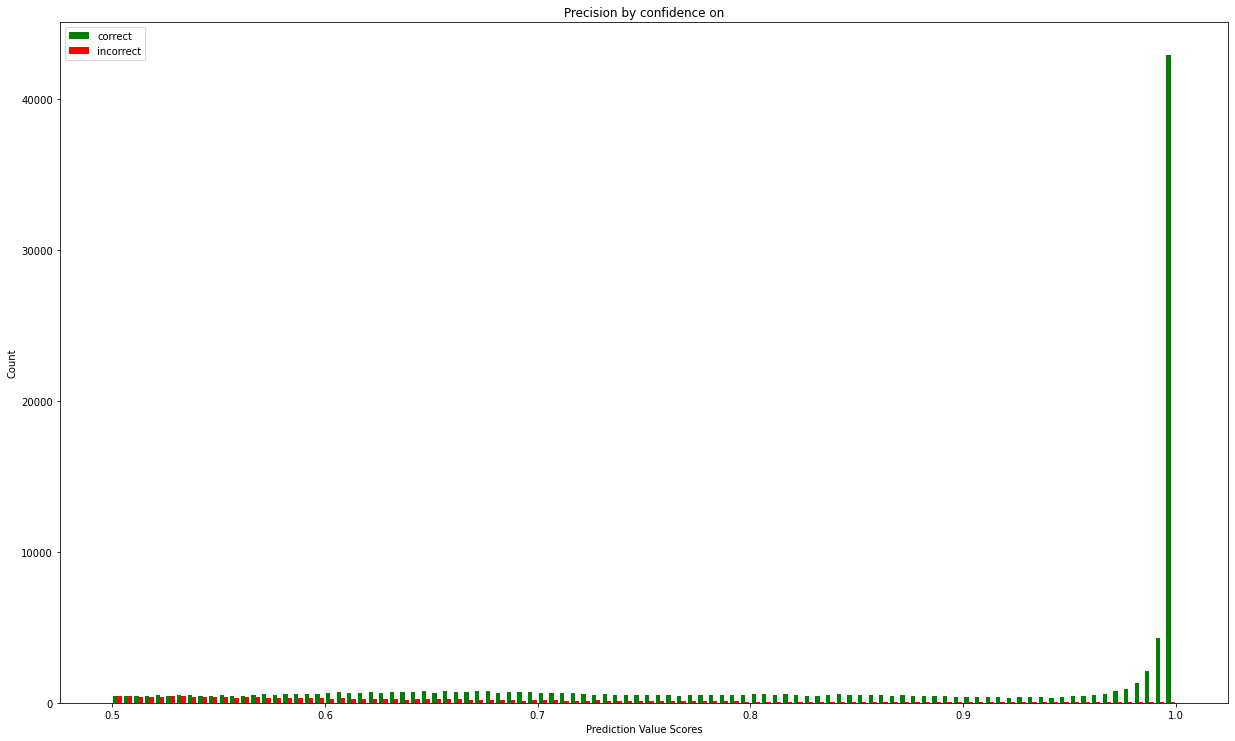

In [210]:
df = df
x1 = df[df["outcome"] == "correct"]["score"]
x2 = df[df["outcome"] == "incorrect"]["score"]


# Assign colors for each airline and the names
colors = ['GREEN', 'RED']
names = ['correct', 'incorrect']
f = plt.figure(figsize=(50,20))
ax = plt.subplot(2, 3, 1)
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
ax.hist([x1, x2], bins = int(100), color = colors, label=names)

# Plot formatting
ax.legend()
ax.set_xlabel('Prediction Value Scores')
ax.set_ylabel('Count')
ax.set_title(f'Precision by confidence on')
#plt.savefig(f'./data/scores2/{.png', bbox_inches="tight")


plt.tight_layout()
plt.show()